In [1]:
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path_to_data = "../data/Simulation_Covid.csv"
df = pd.read_csv(path_to_data, index_col=0)
df

,A,C,G,U,Gener,InitGenome,FrA,FrU,FrG,FrC
1,7539,7445,7402,7614,1000,1,0.251300,0.253800,0.246733,0.248167
2,7584,7407,7300,7709,2000,1,0.252800,0.256967,0.243333,0.246900
3,7635,7350,7186,7829,3000,1,0.254500,0.260967,0.239533,0.245000
4,7673,7296,7090,7941,4000,1,0.255767,0.264700,0.236333,0.243200
5,7704,7246,6986,8064,5000,1,0.256800,0.268800,0.232867,0.241533
...,...,...,...,...,...,...,...,...,...,...
9996,8417,4349,1696,15538,996000,10,0.280567,0.517933,0.056533,0.144967
9997,8411,4351,1696,15542,997000,10,0.280367,0.518067,0.056533,0.145033
9998,8415,4354,1687,15544,998000,10,0.280500,0.518133,0.056233,0.145133
9999,8407,4358,1680,15555,999000,10,0.280233,0.518500,0.056000,0.145267


In [3]:
df_melted = df.melt(
    ["Gener", "InitGenome"], 
    "FrA	FrU	FrG	FrC".split(), 
    var_name="Nucl", value_name='Fr',
)
df_melted["Nucleotide"] = df_melted.Nucl.str.get(2)
df_melted

,Gener,InitGenome,Nucl,Fr,Nucleotide
0,1000,1,FrA,0.251300,A
1,2000,1,FrA,0.252800,A
2,3000,1,FrA,0.254500,A
3,4000,1,FrA,0.255767,A
4,5000,1,FrA,0.256800,A
...,...,...,...,...,...
39995,996000,10,FrC,0.144967,C
39996,997000,10,FrC,0.145033,C
39997,998000,10,FrC,0.145133,C
39998,999000,10,FrC,0.145267,C


In [7]:
nucl_freqs = {
    "A": 1230,
    "U": 2160,
    "G": 277,
    "C": 582,
}
valerian_values = {
    "A": 0.2727969866114955,
    "U": 0.5249263316117408,
    "G": 0.05818693691588984,
    "C": 0.1440897448608736,
}

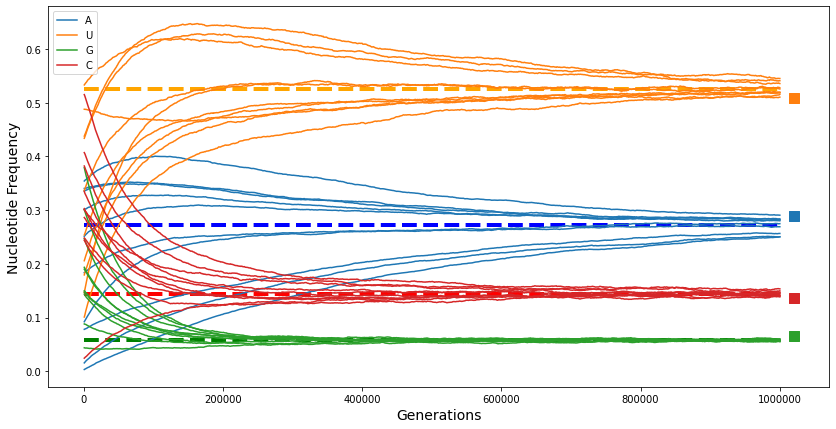

In [22]:
# with plt.xkcd():
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_melted, x="Gener", y="Fr", hue="Nucleotide", units="InitGenome", estimator=None, dashes=False)
plt.hlines(valerian_values.values(), 0, 1_000_000, colors=["blue", "orange", "g", "r"], linestyles="dashed", linewidth=4)

for nucl in nucl_freqs:
    plt.scatter([1_020_000], [nucl_freqs[nucl] / sum(nucl_freqs.values())], marker="s", s=100)

ax.set_xlabel("Generations", fontdict={"fontsize": 14})
ax.set_ylabel("Nucleotide Frequency", fontdict={"fontsize": 14})
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0f}"))
plt.legend(loc=2)
plt.savefig("../figures/simulation.pdf")
plt.show()

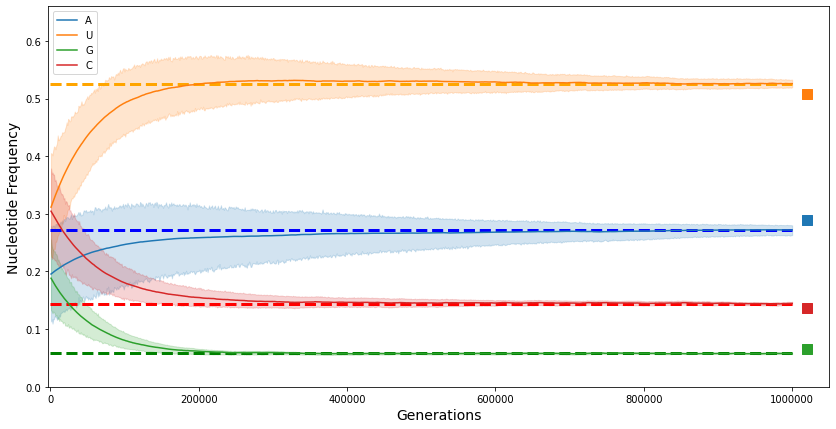

In [37]:
# 40 sec per cell run
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_melted, x="Gener", y="Fr", hue="Nucleotide", dashes=False)
plt.hlines(valerian_values.values(), 0, 1_000_000, colors=["blue", "orange", "g", "r"], linestyles="dashed", linewidth=3)

for nucl, fr in nucl_freqs.items():
    plt.scatter([1_020_000], [fr / sum(nucl_freqs.values())], marker="s", s=100)
    
ax.set_xlabel("Generations", fontdict={"fontsize": 14})
ax.set_ylabel("Nucleotide Frequency", fontdict={"fontsize": 14})
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.0f}"))
plt.legend(loc=2)
plt.xlim((-3000, 1_050_000))
plt.ylim((0, 0.66))
plt.savefig("../figures/simulation_smooth.pdf")
plt.show()